# Binary Classification problem to predict if loan is approved or not

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('data/LoanTrain.csv')
test = pd.read_csv('data/LoanTest.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [6]:
# Let's start with univariate Analysis

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize =True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

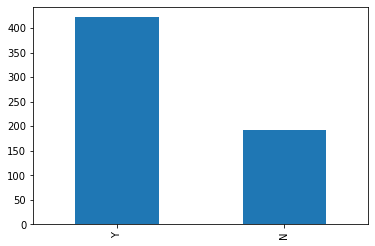

In [9]:
train['Loan_Status'].value_counts().plot.bar()

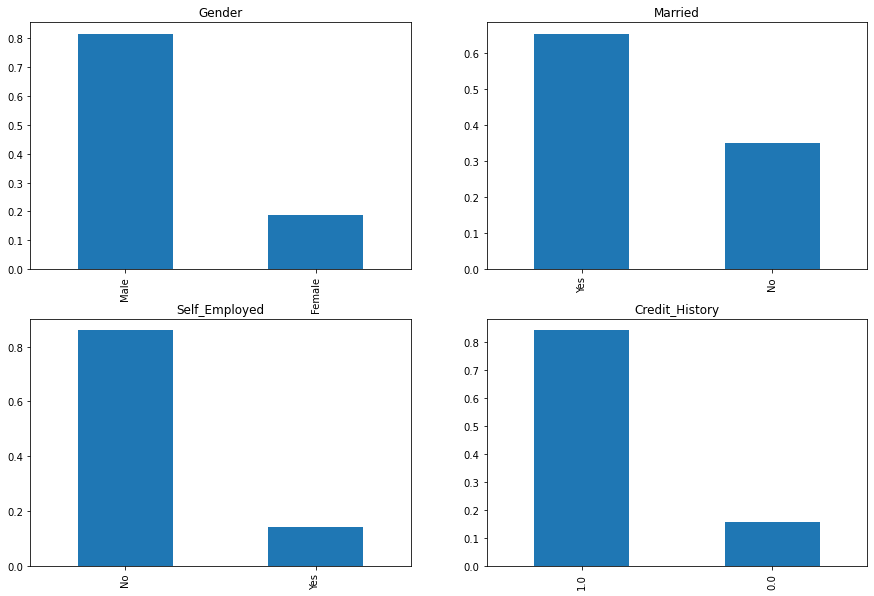

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize =(15,10),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')
plt.show()

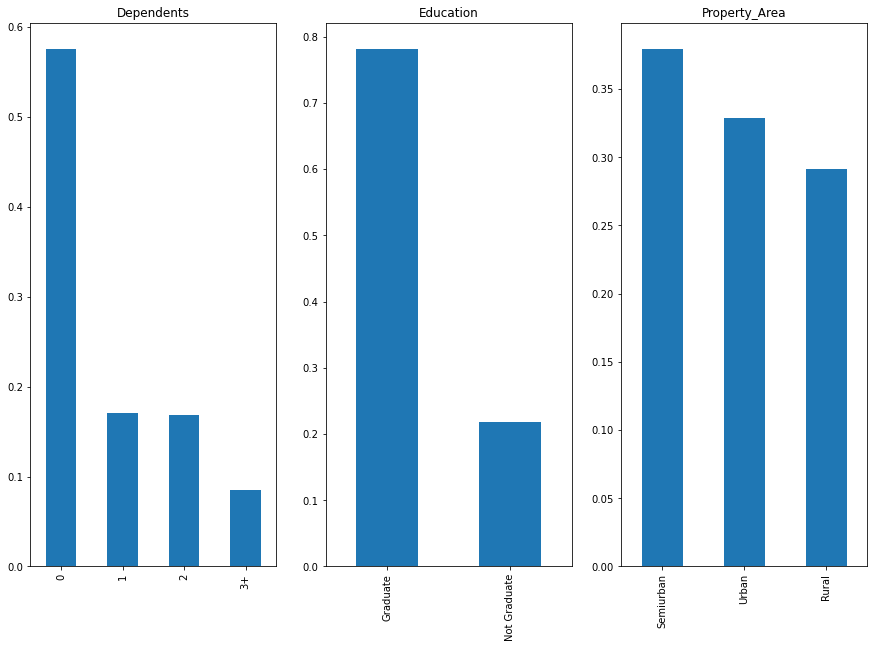

In [11]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize =(15,10),title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

<AxesSubplot:>

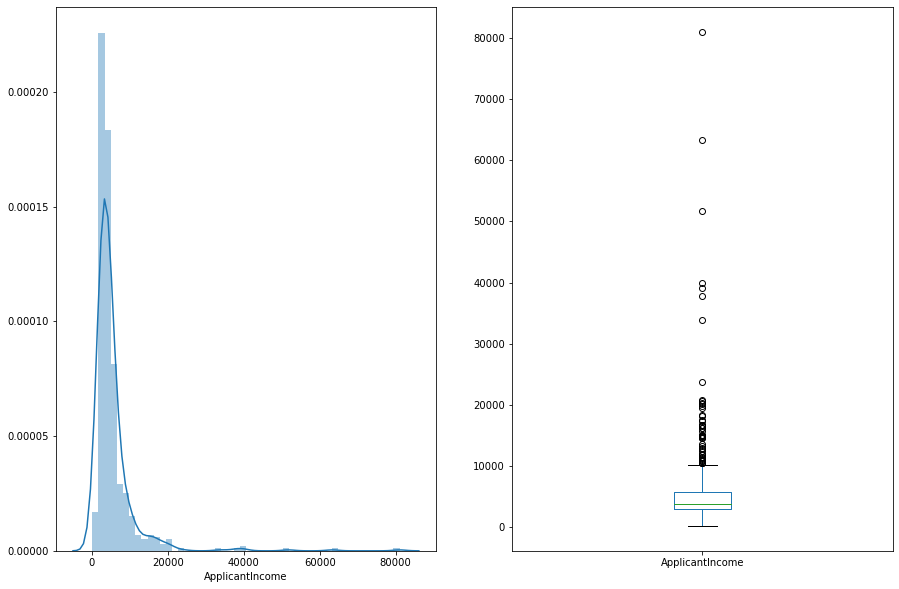

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']) # Right Skewed
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize =(15, 10))   # Outliers are present

Text(0.5, 0.98, '')

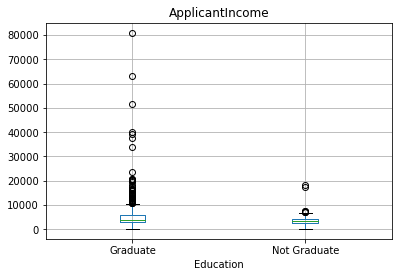

In [13]:
train.boxplot(column ='ApplicantIncome', by ='Education')  # Makes sense that graduates have higher salaries
plt.suptitle("")

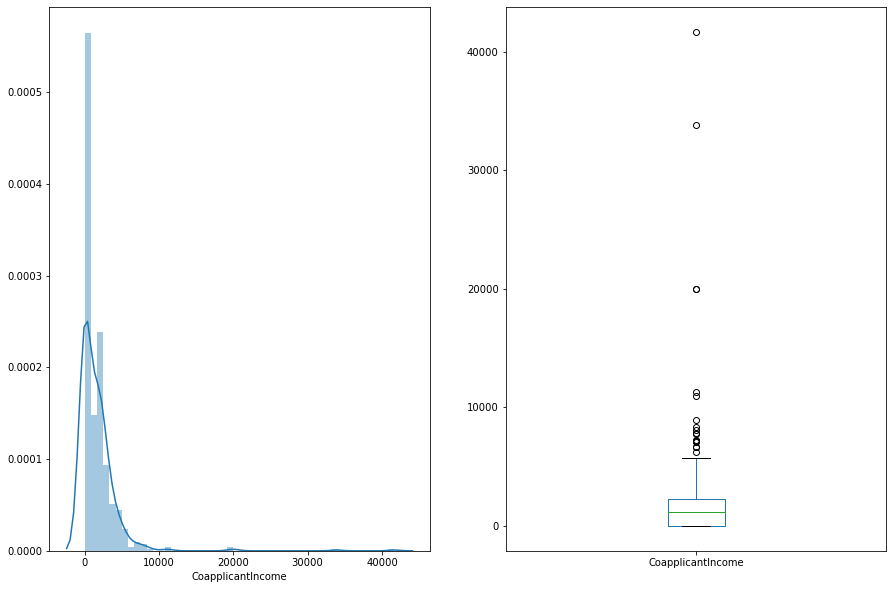

In [14]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']) # Right Skewed
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize =(15, 10))  # Shows outliers
plt.show()

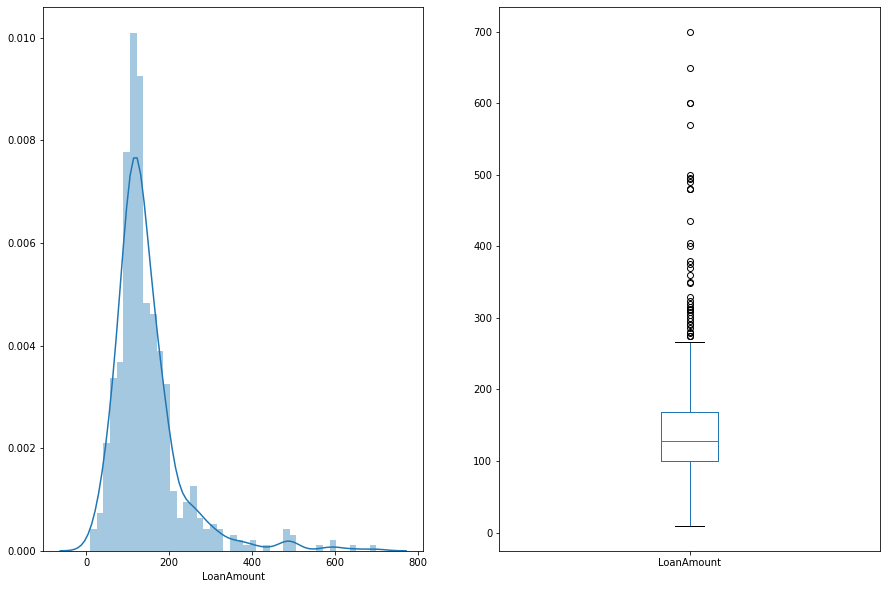

In [15]:
plt.figure(1)
plt.subplot(121)
# df = train.dropna()
sns.distplot(train['LoanAmount']) # Right Skewed
plt.subplot(122)
train['LoanAmount'].plot.box(figsize =(15, 10))   # Shows outliers
plt.show()

In [16]:
# Let's start bivariate analysis

In [17]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

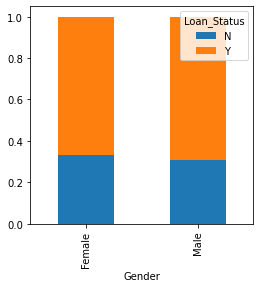

In [18]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked= True, figsize=(4,4)) 

# Loan status does not really depend on the gender 

<AxesSubplot:xlabel='Married'>

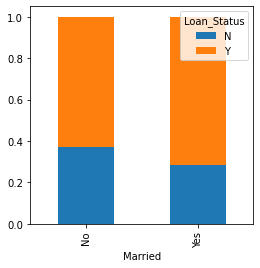

In [19]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked= True, figsize=(4,4))

# Married people has higher chances of getting a loan

<AxesSubplot:xlabel='Dependents'>

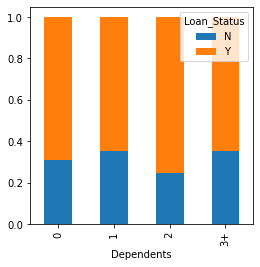

In [20]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize = (4,4))

# Applicants with 2 dependents is more likely to get loan

In [21]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])

In [22]:
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [23]:
Education.sum(1).astype(float)

Education
Graduate        480.0
Not Graduate    134.0
dtype: float64

In [24]:
Education.div(Education.sum(1).astype(float), axis = 0)

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


<AxesSubplot:xlabel='Education'>

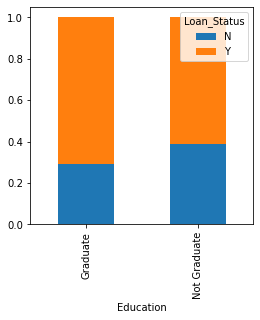

In [25]:
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize=(4,4))
# graduates as expected has more chances to get a loan 

In [26]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed'>

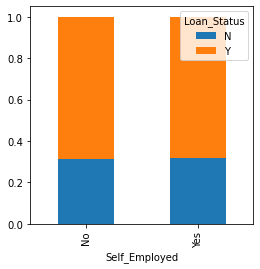

In [27]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize=(4,4))

# Loan status does not seem to depend on Self_Employed status

<AxesSubplot:xlabel='Credit_History'>

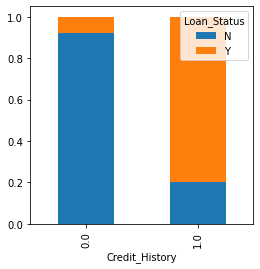

In [28]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize=(4,4))

# Having a credit history makes a huge difference in loan approvals

<AxesSubplot:xlabel='Property_Area'>

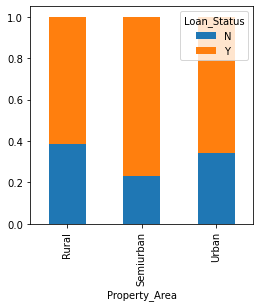

In [29]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize=(4,4))

# Loan approvals are more likely for Semiurban property areas 

<AxesSubplot:xlabel='Loan_Status'>

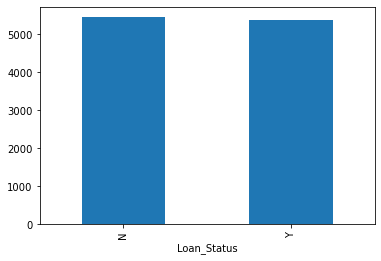

In [30]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

# mean applicant income is almost same both kinds - loan approved and loan denied

In [31]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)

In [32]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very High,46,91


Text(0, 0.5, 'Percentage')

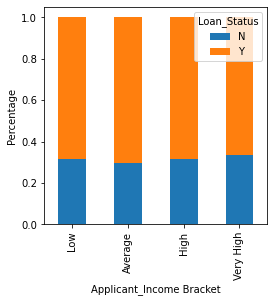

In [33]:
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize =(4,4))
plt.xlabel('Applicant_Income Bracket')
plt.ylabel('Percentage')

# Does not say much

In [34]:
print(train['CoapplicantIncome'].max())
print(train['CoapplicantIncome'].median())

41667.0
1188.5


Text(0, 0.5, 'Percentage')

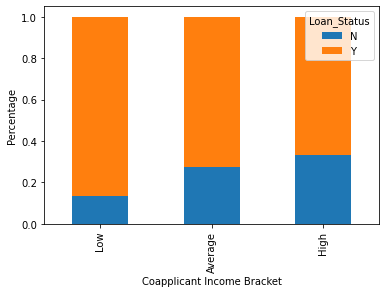

In [35]:
bins = [0, 1000, 3000, 42000]
group =['Low','Average', 'High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('Coapplicant Income Bracket')
plt.ylabel('Percentage')

# Coapplicant income does have an impact on loan status.People with low income for coapplicants have higher chances

In [36]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
print(train['Total_Income'].max())
print(train['Total_Income'].median())

81000.0
5416.5


Text(0, 0.5, 'Percentage')

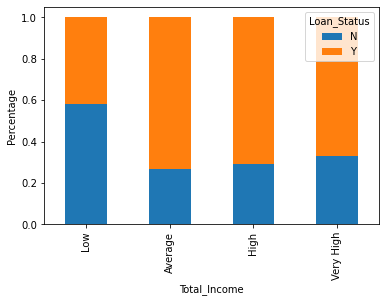

In [37]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels = group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

# Looking at the total income now
# Total income impacts loan status. People with average total income have higher chances 

In [38]:
train['LoanAmount'].max()
train['LoanAmount'].median()

128.0

Text(0, 0.5, 'Percentage')

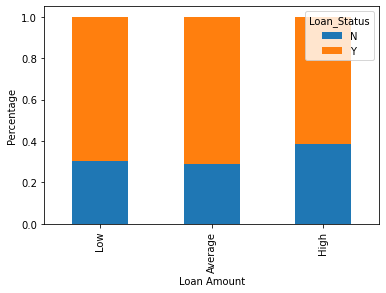

In [39]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

# People with high loan amount have less chances of loan approval

In [40]:
print(train["Loan_Amount_Term"].min())
print(train["Loan_Amount_Term"].median())
print(train["Loan_Amount_Term"].max())

12.0
360.0
480.0


In [41]:
bins = [0, 150, 300, 500]
group = ['short', 'Average', 'Long']
train['Loan_Amount_Term_bin'] = pd.cut(train['Loan_Amount_Term'], bins, labels=group)

Text(0, 0.5, 'Percentage')

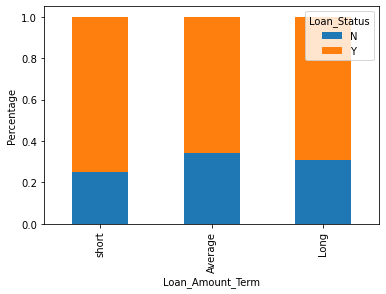

In [42]:
Loan_Amount_Term_bin = pd.crosstab(train['Loan_Amount_Term_bin'], train['Loan_Status'])
Loan_Amount_Term_bin.div(Loan_Amount_Term_bin.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Percentage')

# People with short term for loans have higher chances of loan approval

In [43]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin','Total_Income','Total_Income_bin', 'LoanAmount_bin','Loan_Amount_Term_bin'], axis =1)

In [44]:
train['Dependents'].replace('3+', '3', inplace = True)
test['Dependents'].replace('3+', '3', inplace = True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [45]:
matrix = train.corr()
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

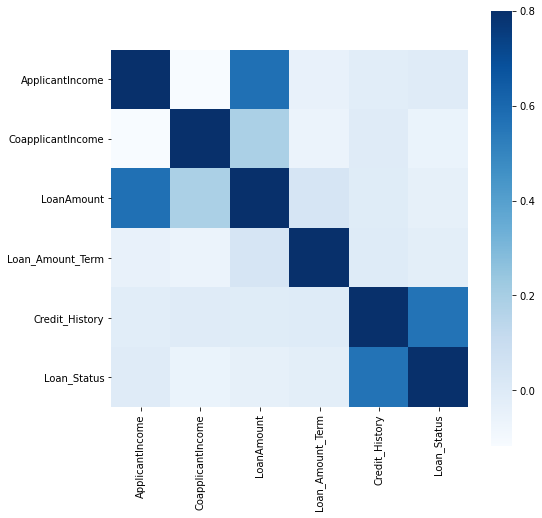

In [46]:
ax = plt.subplots(figsize =(8, 8))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='Blues')  #GnBu , BuGn, Bupu

# Credit history is correlated to Loan status

In [47]:
# Treat null values and outliers which can affect model performance
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [49]:
train['Loan_Amount_Term'].value_counts() # mode is good option for replacement since 360 repeats 512 times

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [50]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)  #Has outliers so median is better option than mean

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [51]:
train.isnull().sum() # no nulls now

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

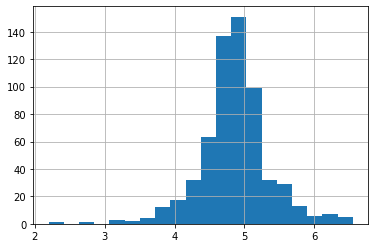

In [52]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])  # LoanAmount distribution was right skewed due to outliers
test['LoanAmount_log'] = np.log(test['LoanAmount'])

train['LoanAmount_log'].hist(bins = 20)  # Now normal distribution 

In [53]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [54]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [55]:
X = train.drop('Loan_Status', 1)
y = train.Loan_Status
X = pd.get_dummies(X) # creating dummy variables for categorical parameters

In [56]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

In [59]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
pred_val = model.predict(x_val)
accuracy_score(y_val, pred_val) # 77.83% accuracy in prediction

0.8

In [61]:
test_data = pd.get_dummies(test)

In [62]:
pred_test = model.predict(test_data)

In [63]:
# Using Stratified K-Fold cross validation technique
#Helpful for imbalanced classification problem

In [64]:
from sklearn.model_selection import StratifiedKFold

In [65]:
i = 1
Final = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits), end =' ')
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xval)
    score = accuracy_score(yval, pred_test)
    Final = Final + score
    print('accuracy_score', score)
    i+=1
print("Average accuracy for 5 fold CV: ", Final/i)


1 of kfold 5 accuracy_score 0.8048780487804879

2 of kfold 5 accuracy_score 0.8373983739837398

3 of kfold 5 accuracy_score 0.7804878048780488

4 of kfold 5 accuracy_score 0.7886178861788617

5 of kfold 5 accuracy_score 0.7950819672131147
Average accuracy for 5 fold CV:  0.6677440135057089


In [66]:
pred_test = model.predict(test_data)
pred = model.predict_proba(xval)[:, 1]    # predicting probabilities for loan approvals for validation dataset 


In [67]:
from sklearn import metrics

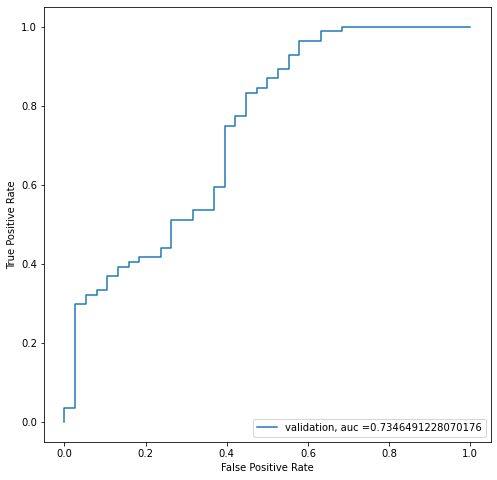

In [68]:
# To understand more on ROC curve : https://stackabuse.com/understanding-roc-curves-with-python/

fpr, tpr, _ = metrics.roc_curve(yval, pred)
auc = metrics.roc_auc_score(yval, pred)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label = 'validation, auc ='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

In [69]:
# Let's see what other features that can affect the loan approval decision (feature engineering :D )

<AxesSubplot:>

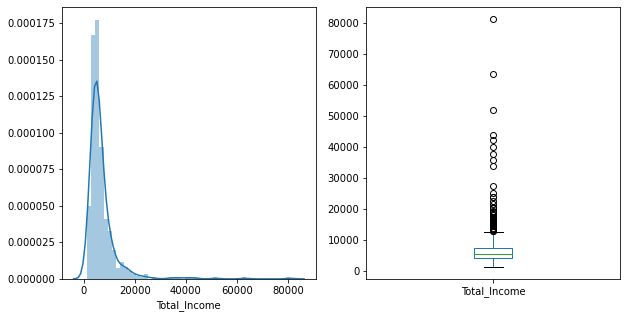

In [70]:
# Add total income
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Let's check it's distribution 
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Total_Income']) # Right Skewed
plt.subplot(122)
train['Total_Income'].plot.box(figsize =(10, 5))   # Outliers are present

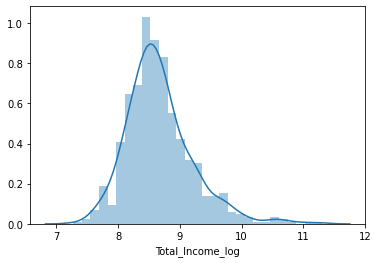

In [71]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']) # almost normal
test['Total_Income_log'] = np.log(test['Total_Income'])

In [72]:
# Add new feature EMI
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI'>

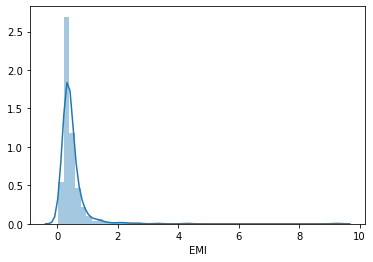

In [73]:
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance'>

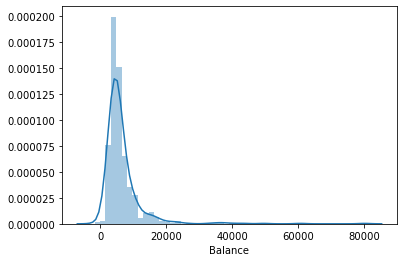

In [74]:
# Add new feature Balance Income
train['Balance'] = train['Total_Income'] -(train['EMI']*1000)
test['Balance'] = test['Total_Income'] -(test['EMI']*1000)
sns.distplot(train['Balance'])

In [75]:
# Removing the old features which we used in the new features as we no longer need those

In [76]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'], axis= 1)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'], axis= 1)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance
0,Male,Yes,0,Graduate,No,1.0,Urban,4.700480,5720,8.651724,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.836282,4576,8.428581,0.350000,4226.000000
2,Male,Yes,2,Graduate,No,1.0,Urban,5.337538,6800,8.824678,0.577778,6222.222222
3,Male,Yes,2,Graduate,No,1.0,Urban,4.605170,4886,8.494129,0.277778,4608.222222
4,Male,No,0,Not Graduate,No,1.0,Urban,4.356709,3276,8.094378,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,1.0,Urban,4.727388,5786,8.663196,0.313889,5472.111111
363,Male,Yes,0,Graduate,No,1.0,Urban,4.744932,4867,8.490233,0.319444,4547.555556
364,Male,No,0,Graduate,No,1.0,Semiurban,4.836282,5243,8.564649,0.350000,4893.000000
365,Male,Yes,0,Graduate,No,1.0,Rural,5.062595,7393,8.908289,0.438889,6954.111111


In [77]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status
X = pd.get_dummies(X)

In [78]:
#Comparing different models now

# 1. Logistic Regression

i = 1
Final = 0 
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits), end =' ')
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xval)
    score = accuracy_score(yval, pred_test)
    Final = Final + score
    print('accuracy_score', score)
    i+=1
print("Average accuracy for 5 fold CV: ", Final/i)


1 of kfold 5 accuracy_score 0.7560975609756098

2 of kfold 5 accuracy_score 0.7235772357723578

3 of kfold 5 accuracy_score 0.6991869918699187

4 of kfold 5 accuracy_score 0.7804878048780488

5 of kfold 5 accuracy_score 0.7540983606557377
Average accuracy for 5 fold CV:  0.618907992358612


In [79]:
# 2. Decision Tree
from sklearn import tree

i = 1
Final = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits), end =' ')
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xval)
    score = accuracy_score(yval, pred_test)
    Final = Final + score
    print('accuracy_score', score)
    i+=1

print("Average accuracy for 5 fold CV: ", Final/i)


1 of kfold 5 accuracy_score 0.7398373983739838

2 of kfold 5 accuracy_score 0.7154471544715447

3 of kfold 5 accuracy_score 0.6585365853658537

4 of kfold 5 accuracy_score 0.7317073170731707

5 of kfold 5 accuracy_score 0.7213114754098361
Average accuracy for 5 fold CV:  0.5944733217823982


In [80]:
# 3. Random Forest 

from sklearn.ensemble import RandomForestClassifier

i = 1
Final = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits), end =' ')
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xval)
    score = accuracy_score(yval, pred_test)
    Final = Final + score
    print('accuracy_score', score)
    i+=1
    
print("Average accuracy for 5 fold CV: ", Final/i)


1 of kfold 5 accuracy_score 0.8292682926829268

2 of kfold 5 accuracy_score 0.8130081300813008

3 of kfold 5 accuracy_score 0.8048780487804879

4 of kfold 5 accuracy_score 0.7804878048780488

5 of kfold 5 accuracy_score 0.7786885245901639
Average accuracy for 5 fold CV:  0.6677218001688213


For more on grid search

https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec#:~:text=GridSearchCV%20is%20a%20library%20function,parameters%20from%20the%20listed%20hyperparameters.

In [82]:
# Let's tune hyperparameters via GridSearch

from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=paramgrid)

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state =1, test_size =0.3)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [88]:
# find best model and use that to make predictions
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)

In [89]:
i = 1
Final = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits), end =' ')
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xval)
    score = accuracy_score(yval, pred_test)
    Final = Final + score
    print('accuracy_score', score)
    i+=1

print("\n Average accuracy for 5 fold CV: ", Final/i)




1 of kfold 5 accuracy_score 0.8211382113821138

2 of kfold 5 accuracy_score 0.8211382113821138

3 of kfold 5 accuracy_score 0.7967479674796748

4 of kfold 5 accuracy_score 0.7967479674796748

5 of kfold 5 accuracy_score 0.7704918032786885

 Average accuracy for 5 fold CV:  0.6677106935003776


<AxesSubplot:>

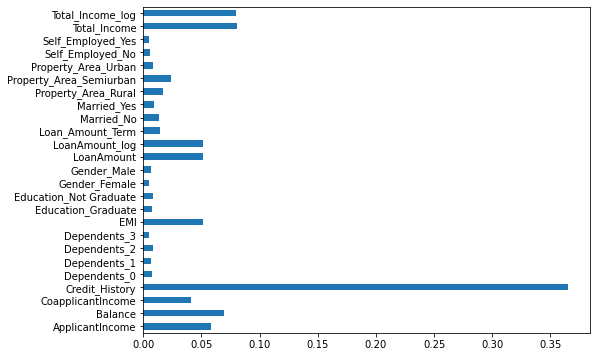

In [85]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_index().plot(kind ='barh', figsize=(8,6))

In [86]:
# 4.XGBoost
from xgboost import XGBClassifier

In [90]:
i = 1
Final = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits), end =' ')
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y[train_index], y[test_index]
    model = XGBClassifier(n_estimators = 50, max_depth = 4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xval)
    score = accuracy_score(yval, pred_test)
    Final = Final + score
    print('accuracy_score', score)
    i+=1

print("\n Average accuracy for 5 fold CV: ", Final/i)


1 of kfold 5 accuracy_score 0.7967479674796748

2 of kfold 5 accuracy_score 0.7479674796747967

3 of kfold 5 accuracy_score 0.7723577235772358

4 of kfold 5 accuracy_score 0.7642276422764228

5 of kfold 5 accuracy_score 0.7704918032786885

 Average accuracy for 5 fold CV:  0.6419654360478031
